In [16]:
#!pip install dlib==19.20.0

In [37]:
import dlib
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
dlib.__version__

'19.20.0'

In [9]:
#set the object and model 
detector = dlib.get_frontal_face_detector()
sp = dlib.shape_predictor("shape_predictor_5_face_landmarks.dat")
model = dlib.face_recognition_model_v1('dlib_face_recognition_resnet_model_v1.dat')

In [11]:
#load the image 
img1 = dlib.load_rgb_image('me.jpg')
img2 = dlib.load_rgb_image('me_id.jpg')

In [25]:
#apply face detection  using detector object 
img1_detect = detector(img1,1)
img2_detect = detector(img2,1)


In [28]:
#get the image shapes 
img1_shape = sp(img1,img1_detect[0])
img2_shape = sp(img2,img2_detect[0])

In [29]:
#align the images 
img1_align = dlib.get_face_chip(img1, img1_shape)
img2_align = dlib.get_face_chip(img2, img2_shape)

Text(0.5, 1.0, 'card image')

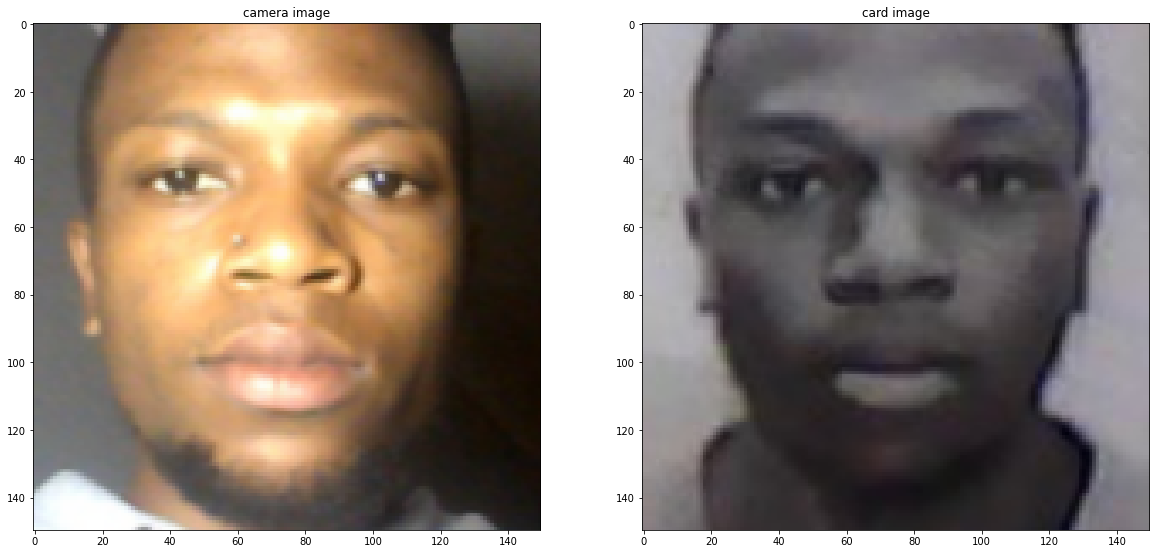

In [35]:
#view the images 
plt.figure(figsize=[20,10])
plt.subplot(121); plt.imshow(img1_align); plt.title('camera image')
plt.subplot(122); plt.imshow(img2_align); plt.title('card image')

In [36]:
#implement the model 
img1_rep = model.compute_face_descriptor(img1_align)
img2_rep = model.compute_face_descriptor(img2_align)

In [38]:
#the representation of the images are dlib.vectors we need to convert them into numpy arrays
img1_rep = np.array(img1_rep)
img2_rep = np.array(img2_rep)

the final step is verification we need to find the distance between the arrays
the greater the distance the less similar the images are to each other.
Create a function that find the euclidian distance between the images 

In [39]:
def find_distance(img_x1, img_x2):
    euclidian_distance = img_x1 - img_x2
    euclidian_distance = np.sum(np.multiply(euclidian_distance,euclidian_distance))
    euclidian_distance = np.sqrt(euclidian_distance)
    return euclidian_distance



In [40]:
distance = find_distance(img1_rep,img2_rep)

0.3829851231253472

In [41]:
#threshold value 
threshold = 0.6 

if threshold < 0.6 :
    print("They are the same")
else :
    print("they are different")

they are different
